<a href="https://colab.research.google.com/github/sonovman/DL_Term_PJT/blob/main/Tutorial_4_CIFAR10_%EC%97%B0%EC%8A%B5_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 라이브러리 로드

필요한 라이브러리를 로드해줍니다.

In [ ]:
from __future__ import print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

## 2. 데이터셋 로드

이번에도 [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) 데이터를 사용할 예정입니다. 

CIFAR-10에 대한 데이터 살펴보기 예제는 [지난 튜토리얼](https://github.com/Intelligence-Engineering-LAB-KU/Deeplearning-Tutorial/blob/master/Tutorial_1_CIFAR10_Softmax.ipynb)를 복습해주세요.


In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


## 3. 클래스 이진코드화

[지난 튜토리얼](https://github.com/Intelligence-Engineering-LAB-KU/Deeplearning-Tutorial/blob/master/Tutorial_1_CIFAR10_Softmax.ipynb)에서와 같이, 클래스를 이진코드화 해보겠습니다.

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)

print('y_train shape (이진화 전)', y_train.shape)
print('y_train[0]:', y_train[0])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('y_train shape (이진화 후)', y_train.shape)
print('y_train[0]:', y_train[0])

y_train shape (이진화 전) (50000, 1)
y_train[0]: [6]
y_train shape (이진화 후) (50000, 10)
y_train[0]: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### 4. CIFAR10 분류 CNN 모델 생성

4장에서는 Keras의 [Conv2d API](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) 등을 이용하여 CIFAR-10 분류를 위한 CNN 기반 모델을 정의해보겠습니다. 

```python
tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid', data_format=None,
    dilation_rate=(1, 1), activation=None, use_bias=True,
    kernel_initializer='glorot_uniform', bias_initializer='zeros',
    kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None,
    kernel_constraint=None, bias_constraint=None, **kwargs
)
```
#### 4.1. 모델 아키텍쳐

다음과 같은 모델을 구현해보겠습니다.

![](https://imgur.com/SDxHEhR.png)

In [ ]:
from tensorflow.keras.layers import MaxPool2D
MaxPool2D(pool_size=(2, 2))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.regularizers import l1

tf.random.set_seed(2020)

model = Sequential([
    Conv2D(filters=2,kernel_size=(3,3), padding='same', activation='relu', 
           input_shape=(32, 32, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=4,kernel_size=(3,3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=8,kernel_size=(3,3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=16,kernel_size=(3,3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=32,kernel_size=(3,3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=64,kernel_size=(3,3), padding='same', activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')])

## 5. 모델 학습

이제 모델을 학습시켜보겠습니다.

In [ ]:
tf.random.set_seed(2020)

opt = keras.optimizers.Adam()

# 모델 생성
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

norm_x_train = x_train.astype('float32')
norm_x_test = x_test.astype('float32')
norm_x_train /= 255
norm_x_test /= 255

model.fit(norm_x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(norm_x_test, y_test),
          shuffle=True)

Epoch 1/10
1563/1563 [==============================] - 18s 6ms/step - loss: 1.9012 - accuracy: 0.2703 - val_loss: 1.6878 - val_accuracy: 0.3654
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6558 - accuracy: 0.3772 - val_loss: 1.6106 - val_accuracy: 0.4010
Epoch 3/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.5882 - accuracy: 0.4124 - val_loss: 1.5549 - val_accuracy: 0.4245
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5344 - accuracy: 0.4358 - val_loss: 1.4945 - val_accuracy: 0.4504
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4958 - accuracy: 0.4526 - val_loss: 1.4712 - val_accuracy: 0.4638
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4624 - accuracy: 0.4698 - val_loss: 1.4474 - val_accuracy: 0.4728
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4372 - accuracy: 0.4822 - val_loss: 1.4226 - val_accuracy

## 6. 모델 성능 테스트

모델의 성능을 테스트해보겠습니다.

In [ ]:
scores = model.evaluate(norm_x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 1.3827 - accuracy: 0.4994
Test loss: 1.3827385902404785
Test accuracy: 0.49939998984336853


정확도가 50% 정도되는 간단한 모델을 만들어보았습니다.

## 7. 해보기

모델 부분을 수정하여서, 테스트 성능이 60% 이상 나오는 모델을 만들어보세요!

###**[기존 모델 분석과 모델 개선방향의 설정]**

#### **1) 모델의 프레임과 아키텍처에 대한 검토**

우선 기존 모델의 첫 은닉층의 필터(커널) 수가 너무 적고 비정상적으로 전개되어 있있다. 따라서 적정하게 필터(커널) 수를 재설정하여야 한다.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 2)         56        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 2)        0         
 2D)                                                             
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 4)         76        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 4)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 8)           296       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 8)          0

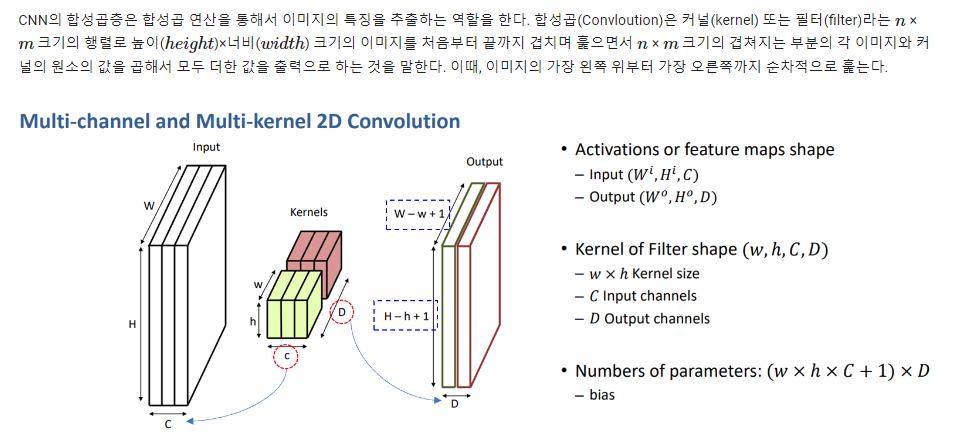

CIFAR-10 데이터 세트에 대한 기본 모델을 조사하여 모델 아키텍처의 기준선을 정하여야 한다. 기준선 모델은 다른 모든 모델과 비교할 수 있는 최소 모델 성능과 연구 및 개선의 기초로 사용할 수 있는 모델 아키텍처를 설정하는 것이 바람직하다.

좋은 출발점은 ILSVRC 2014 대회에서 최고의 성능을 달성했고 아키텍처의 모듈식 구조가 이해하고 구현하기 쉬운 VGG 모델이 일반적인 아키텍처의 원칙이다. VGG 모델에 대한 자세한 내용은 2015년 논문 " Very Deep Convolutional Networks for Large-Scale Image Recognition "을 참조하라.

아키텍처는 작은 3×3 필터와 최대 풀링 레이어가 있는 컨볼루션 층을 쌓는 것을 포함한다. 이러한 층은 블록을 형성하고 이러한 블록은 모델의 처음 4개 블록에 대해 32, 64, 128, 256과 같이 네트워크의 깊이에 따라 각 블록의 필터 수가 증가하는 곳에서 반복될 수 있다. 패딩은 출력 피처 맵의 높이와 너비가 입력과 일치하도록 컨벌루션 층에서 사용된다.

컨볼루션 층을 떠나면 먼저 모델의 특징 추출 부분에서 출력된 특징 맵을 평면화해야 한다. 그런 다음 하나 이상의 완전 연결 층으로 해석한 다음 예측을 출력할 수 있다. 출력층에는 10개의 클래스에 대해 10개의 노드가 있어야 하며 softmax 활성화 함수를 사용해야 한다. 모델은 확률적 경사하강법을 사용하여 최적화된다.

0.001의 적당한 학습률과 0.9의 큰 모멘텀을 사용하는 것에서 시작하는 것이 바람직하다. 이 모델은 다중 클래스 분류에 필요한 범주형 교차 엔트로피 손실 함수 를 최적화하고 분류 정확도를 모니터링한다.

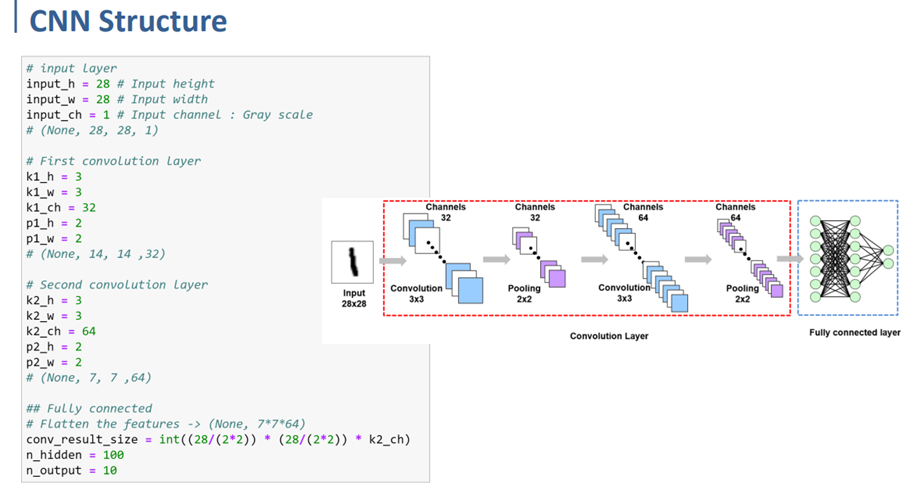

###**[커널수의 정상화]**

- 1) 제1 Conv2D 층의 출력 필터수를 기존 2개에서 32개로 늘린다. 
- 2) 제2 Conv2D 층의 출력 필터수를 기존 4개에서 32개로 늘린다.
- 3) 제3 Conv2D 층의 출력 필터수를 기존 8개에서 64개로 늘린다.
- 4) 제4 Conv2D 층의 출력 필터수를 기존 16개에서 64개로 늘린다.
- 5) 제5 Conv2D 층의 출력 필터수를 기존 32에서 128개로 늘린다.
- 6) 제4 Conv2D 층의 출력 필터수를 기존 64개에서 128개로 늘린다.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.regularizers import l1, l2

tf.random.set_seed(2020)

my_model1 = Sequential([
    Conv2D(filters=32,kernel_size=(3,3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=32,kernel_size=(3,3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=64,kernel_size=(3,3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=64,kernel_size=(3,3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=128,kernel_size=(3,3), padding='same', activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=128,kernel_size=(3,3), padding='same', activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')])

opt = keras.optimizers.Adam()

my_model1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

my_model1.fit(norm_x_train, y_train,
          batch_size=32,
          epochs=10,
          validation_data=(norm_x_test, y_test),
          shuffle=True)

scores = my_model1.evaluate(norm_x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5618 - accuracy: 0.4111 - val_loss: 1.2678 - val_accuracy: 0.5382
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1322 - accuracy: 0.5921 - val_loss: 1.0438 - val_accuracy: 0.6312
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9496 - accuracy: 0.6641 - val_loss: 0.9684 - val_accuracy: 0.6650
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8449 - accuracy: 0.7014 - val_loss: 0.8835 - val_accuracy: 0.6902
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7624 - accuracy: 0.7320 - val_loss: 0.8549 - val_accuracy: 0.7005
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6944 - accuracy: 0.7550 - val_loss: 0.8309 - val_accuracy: 0.7130
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6463 - accuracy: 0.7705 - val_loss: 0.8574 - val_accuracy

**[성능평가]**
**개선 모델의 정확도는 71%까지 개선되었다. 기존 모델의 정확도가 50%이었던 점을 고려하면 커다란 성과이다.**

In [ ]:
my_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)          18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 64)        

### **2) 모델의 오버피팅 가능성에 대한 검토**

기존 모델을 더 개선할 점은 없을까 고민해보았다. 기존 모델 구조를 보면, 가중치 감소, 드롭아웃과 같은 정규화나 배치정규화를 전혀 적용하지 않았다. 

따라서 조금이라도 더 성능을 향상시키기 위해 가중치 감소 및 드롭아웃 정규화 기법과 배치 정규화 기법을 반영하여 모델 성능의 개선여부를 확인해보고자 한다.

###**[정규화 기법(Regularization Techniques)의 반영]**

정규화 기법은 모델의 학습이 빠르게 수렴하는 속도를 늦추는 기술이라고 말할 수 있다. 어느 특정 Feature가 출력값에 큰 상관관계가 있다면, 정규화 기법을 적용하지 않고 학습하면 해당 Feature에 가중치가 가장 크게 설정되어 나머지 Feature는 제대로 학습되지 않게 된다. 한마디로 학습의 편견이 모델을 지배하게 된다.
모델 학습의 오버피팅을 억제하는 대표적인 정규화 기술로 가중치 감소와 드롭아웃이 있다.

가중치 감소 기법은 손실함수에 가중치의 L2노름을 더하는 기법으로 간단하게 구현할 수 있고 어느 정도는 지나친 학습을 억제할 수 있다. 그러나 신경망 모델이 복잡해지면 가중치 감소만으로 대응하기 어려워진다. 이럴 때 흔히 드롭아웃(drop out)이라는 기법을 이용한다.

###**1) 드롭아웃(drop out)**

드롭아웃(drop out)은 어떤 특정한 설명변수 Feature만을 과도하게 집중하여 학습함으로써 발생할 수 있는 과대적합(Overfitting)을 방지하기 위해 사용된다. 
드롭아웃(drop out)은 뉴런을 임의로 삭제하면서 학습하는 방법이다. 학습 때 은닉층의 뉴런을 무작위로 골라 삭제한다. 삭제된 뉴런은 그림과 같이 신호를 전달하지 않게 된다. 학습 때는 데이터를 흘릴 때마다 삭제할 뉴런을 무작위로 선택하고, 테스트 때는 모든 뉴런에 신호를 전달한다. 단, 테스트 때는 각 뉴런의 출력에 학습 때 삭제 안 한 비율을 곱하여 출력한다.

<참고> Nitish Srivastava, Geoffrey Hinton, Alex Krizhevsky, Ilya Sutskever, Ruslan Salakhutdinov; “Dropout: A Simple Way to Prevent Neural Networks from Overfitting “, 15(56):1929−1958, 2014


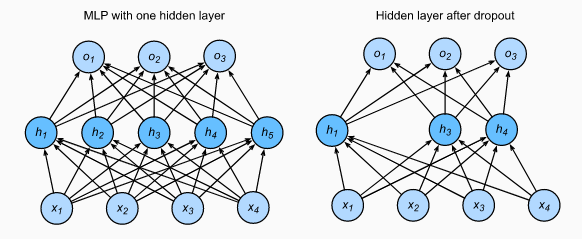

드롭 아웃은 새 드롭아웃 계층을 추가하여 모델에 추가할 수 있다. 여기서 제거된 노드의 양은 하이퍼 파라미터로 지정한다. 모델에서 드롭아웃층을 추가할 위치와 사용할 도면층의 양에 관한 다양한 선택적 패턴이 있다. 

많이 사용하는 패턴은 각 최대 풀링층(max pooling layer)와 완전 연결층(fully connected layer) 뒤에 드롭아웃 층을 추가하고, 약 20%의 고정 드롭아웃률을 사용한다. 20%의 고정 드롭아웃률이란 노드의 80%가 유지된다는 것을 의미한다.


**[모델 개선]**
개선될 모델은 각각 Max Pooling 층 뒤에 Drop-out 층을 추가하려고 한다. 기존 모델의 Max Pooling 층이 5개이었으므로 그 뒤에 추가할 Drop-out 층도 5개가 될 것이다. 하이퍼파마리미터는 모든 층에서 0.2로 고정하여 학습해본 후 성능을 보려고 한다. 


###**2) 가중치 감쇠(Weight Decay)**

가중치 정규화 또는 가중치 감쇠는 모델 가중치의 크기에 비례하여 모델에 페널티를 부여하는 손실 함수 업데이트가 포함된다. 모델은 가중치가 클수록 더 복잡하고 덜 안정적인 반면, 가중치가 작을수록 더 안정적이고 일반화되기 때문에 이러한 업데이트는 정규화 효과가 있다.

네트워크 가중치가 커지면 입력의 작은 변화에도 출력의 변화가 커져 네트워크의 불안정성이 증가한다. 이것은 네트워크가 학습 데이터 세트에 과대적합 되어 새로운 데이터에 대한 예측을 수행할 때 제대로 수행되지 않는다는 신호일 수 있다.

이 문제에 대한 해결책은 네트워크가 가중치를 작게 유지하도록 학습 알고리즘을 업데이트하는 것이다. 이를 가중치 정규화라고 한다. 또한 학습 중에 네트워크 가중치의 크기에 따라 네트워크에 페널티를 주면 과적합을 줄일 수 있다. 네트워크 최적화에 L1 또는 L2 벡터 놈 페널티를 추가하여 더 작은 가중치를 장려할 수 있다.


가중치 정규화의 구현은 “kernel_regularizer” 인수를 정의하고 정규화 유형을 지정하여 가중치 정규화를 컨볼루션 층과 완전 연결층에 추가할 수 있다. 인공신경망에 가장 일반적으로 사용되는 유형은, L2 가중치 정규화를 사용하고 합리적인 기본 가중치 0.001을 사용한다.

**[모델 개선]** 개선될 모델은 모든 컨볼루션층에 L2 가중치 정규화(가중치 감쇠)을 반영하려고 한다.

###**[배치정규화 (Batch Normalization)의 반영]**

좀더 성능을 개선하는 방법으로 

학습 에포크 수를 10에서 100으로 늘려 모델을 개선할 기회를 더 많이 줄 수 있다. 이에 따라 학습을 안정화하고 학습 프로세스를 가속화하기 위해 "**배치 정규화**" 를 추가할 수 있습니다. 이 가속을 상쇄하기 위해 드롭아웃을 고정 패턴에서 증가 패턴으로 변경하여 정규화를 높일 수 있다.

역전파학습의 고질적인 문제인 Gradient Vanishing 문제를 해결하기 위해 1)활성함수를 시그모이드에서 ReLU로 교체하고, 2) 초기화를 잘 하는 방법을 사용하였다. 다양한 초기화 전략은 활성함수의 출력값을 정규분포로 만들기 위해 한 작업이다. 그럼 바로 출력값을 정규화 하면 되지 않을까?란 질문에서  배치정규화 (Batch Normalization) 기법이 탄생하였다. 배치단위로 정규화하여 정규분포를 만들고, 감마와 베타를 이용해 새로운 값을 내놓는다.

배치정규화(BN)이 regularizer의 역할을 한다. 항상 그렇지는 않지만 Dropout을 제거해도 비슷한 성능을 보이고, 일반적으로 성능이 상승한다. 또한 배치 단위로 정규화를 하면서 모델에 노이즈를 주는 것으로 해석 가능해진다. 따라서 노이즈로 인해 성능이 좋아진다 (배치단위로 정규화를 하면 평균과 분산이 전체 평균의 분산과 값이 약간 다를 수 있다. 이는 일종의 노이즈가 됨). 

Dropout처럼 학습/테스트 단계의 연산이 다르다. 학습단계에서는 데이터가 배치단위로 들어오기 때문에 배치의 평균, 분산을 구하는 것이 가능 하지만, 테스트 단계에서는 배치 단위로 평균/분산을 구하기가 어렵다. 이를 해결하기 위해서 i) 학습단계에서 배치단위의 평균/분산을 저장해놓고(이동평균), ii) 테스트시에는 구해진 이동평균을 사용하여 정규화한다.

 배치단위로 정규화하여 정규분포를 만들고, 감마와 베타를 이용해 새로운 값을 내놓는다.



일반적으로 레이어를 거친 뒤, 배치 정규화를 수행하고 이를 활성함수의 입력값으로 전달한다. 즉, 배치정규화를 일종의 레이어라 생각하고 구현한다.

###**3) 정규화 개선 모델 설계**

**앞에서 논의한 대로, 기존 모델에서서 각각 Max Pooling 층 뒤에 0.2의 Drop-out 층을 추가하고, 모든 콘볼루션층에 L2 가중치 정규화(가중치 감쇠)을 반영한다. L2의 값은 0.001 로 하였다. 나아가 Conv2D층 뒤에 배치정규화층을 추가한다.**

**나아가 에코트를 50회까지 늘려서 좀더 학습할 기회를 부여했다.**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from keras.regularizers import l1, l2

tf.random.set_seed(2020)

my_model2 = Sequential([
    Conv2D(filters=32,kernel_size=(3,3), padding='same', kernel_regularizer=l2(0.001), activation='relu', input_shape=(32, 32, 3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(filters=32,kernel_size=(3,3), padding='same', kernel_regularizer=l2(0.001), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(filters=64,kernel_size=(3,3), padding='same', kernel_regularizer=l2(0.001), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(filters=64,kernel_size=(3,3), padding='same', kernel_regularizer=l2(0.001), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(filters=128,kernel_size=(3,3), padding='same',kernel_regularizer=l2(0.001), activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(filters=128,kernel_size=(3,3), padding='same',kernel_regularizer=l2(0.001), activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')])

opt = keras.optimizers.Adam()

my_model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

my_model2.fit(norm_x_train, y_train,
          batch_size=32,
          epochs=50,
          validation_data=(norm_x_test, y_test),
          shuffle=True)

scores = my_model2.evaluate(norm_x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/50
1563/1563 [==============================] - 13s 7ms/step - loss: 1.7334 - accuracy: 0.4488 - val_loss: 1.7088 - val_accuracy: 0.4809
Epoch 2/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4409 - accuracy: 0.5692 - val_loss: 1.3979 - val_accuracy: 0.5897
Epoch 3/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3385 - accuracy: 0.6141 - val_loss: 1.4079 - val_accuracy: 0.6041
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2712 - accuracy: 0.6446 - val_loss: 1.2950 - val_accuracy: 0.6437
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2283 - accuracy: 0.6664 - val_loss: 1.4654 - val_accuracy: 0.5847
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1988 - accuracy: 0.6812 - val_loss: 1.1100 - val_accuracy: 0.7123
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1863 - accuracy: 0.6869 - val_loss: 1.4422 - val_ac

**[성능평가]**
**개선 모델의 정확도는 74%까지 개선되었다. 기존 모델의 정확도가 50%이었던 점을 고려하면 커다란 성과이다.**

In [ ]:
my_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 32)      



## Reference

- [cs231n](http://cs231n.github.io/)
- [Keras tutorial on CIFAR-10](https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py)



---



## 추가 참고자료 (Reference Plus)


- [04. 배치정규화 (Batch Normalization)](http://astralworld58.tistory.com/65)
- [Batch Normalization (ICML 2015)](http://sanghyukchun.github.io/88/)
- [Batch Normalization](http://funmv2013.blogspot.com/2016/09/batch-normalization.html)

---
- [cs231n](http://cs231n.github.io/)
- [CS231n Convolutional Neural Networks for Visual Recognition](https://cs231n.github.io/convolutional-networks/)
- [Deep Learning with Python 2판 자료](https://codingalzi.github.io/dlp/)
- [Keras tutorial on CIFAR-10](https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py)

---
- [TensorFlow for Computer Vision — How to Implement Convolutions From Scratch in Python](https://towardsdatascience.com/tensorflow-for-computer-vision-how-to-implement-convolutions-from-scratch-in-python-609158c24f82)
- 

---
- [CNN 역전파를 이해하는 가장 쉬운 방법](https://metamath1.github.io/cnn/index.html)
- [How to Develop a CNN From Scratch for CIFAR-10 Photo Classification](https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/)
- [How to Accelerate Learning of Deep Neural Networks With Batch Normalization](https://machinelearningmastery.com/how-to-accelerate-learning-of-deep-neural-networks-with-batch-normalization/)
- [A Gentle Introduction to Dropout for Regularizing Deep Neural Networks](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/)
- [Use Weight Regularization to Reduce Overfitting of Deep Learning Models](https://machinelearningmastery.com/weight-regularization-to-reduce-overfitting-of-deep-learning-models/)

[Keras-Korean-API](https://keras.io/ko/)

[Keras-API](https://keras.io/api/)

**[EOD]**